In [287]:
from src.Prep import *
from src.Time_Series_Helper_Funcs import *
from src.Regression_Helper_Funcs import *
from src.Plot import * 
import warnings
warnings.filterwarnings('ignore')

In [288]:
%load_ext autoreload
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [289]:
%autoreload

# DATA
## Load in, clean, sort, and filter data

In [5]:
df = prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
3 of 11 |    Concatenating datasets together
4 of 11 |    Refining to only RES Customer Segment
5 of 11 |    Cleaning up column names
6 of 11 |    Sorting values by installation_date
7 of 11 |    Assigning installation_date as index
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------------------------------------------------------------


In [147]:
y = time_frame(df)
y = y.dropna()

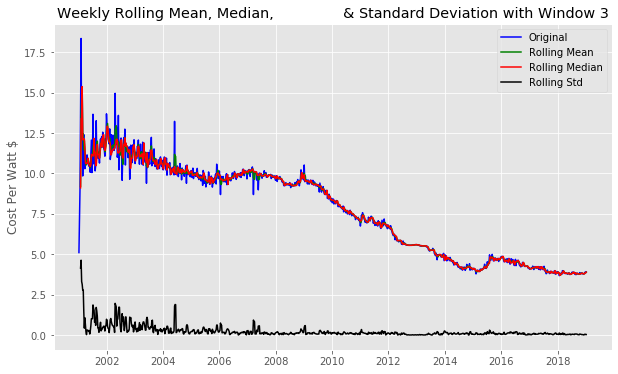

Results of Dickey-Fuller Test:
Test Statistic            0.121576
p-value                   0.967504
#Lags Used               22.000000
#Observations Used      916.000000
Critical Value (1%)      -3.437509
Critical Value (5%)      -2.864700
Critical Value (10%)     -2.568453
dtype: float64


In [148]:
rolling_plot(y)
dfuller_test(y)

## Check for Stationarity

In [150]:
test_for_stationarity(y)

ADF p-value: 0.97
Time Series is not stationary. Fail to reject ADF H0


## Create Stationarity by Using Differences of Data

In [162]:
y = time_frame(df)
diff = get_differences(y)
diff = diff.dropna()

## Re-check for Stationarity Given Differenced Data

In [154]:
test_for_stationarity(diff)

ADF p-value: 0.00
Achieved stationarity! Reject ADF H0.


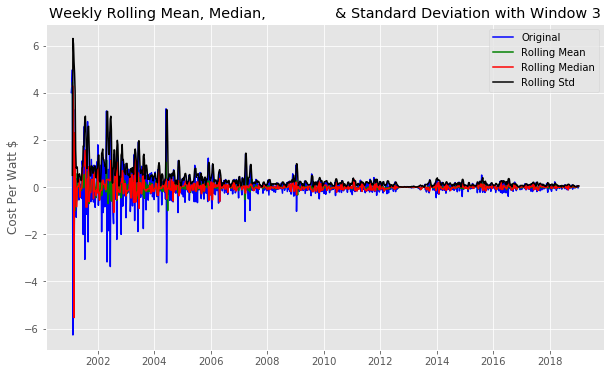

Results of Dickey-Fuller Test:
Test Statistic         -8.024643e+00
p-value                 2.032730e-12
#Lags Used              2.200000e+01
#Observations Used      9.150000e+02
Critical Value (1%)    -3.437517e+00
Critical Value (5%)    -2.864704e+00
Critical Value (10%)   -2.568455e+00
dtype: float64


In [95]:
rolling_plot(diff)
dfuller_test(diff)

# REGRESSION
## Run through basic regression models: 

In [313]:
%autoreload

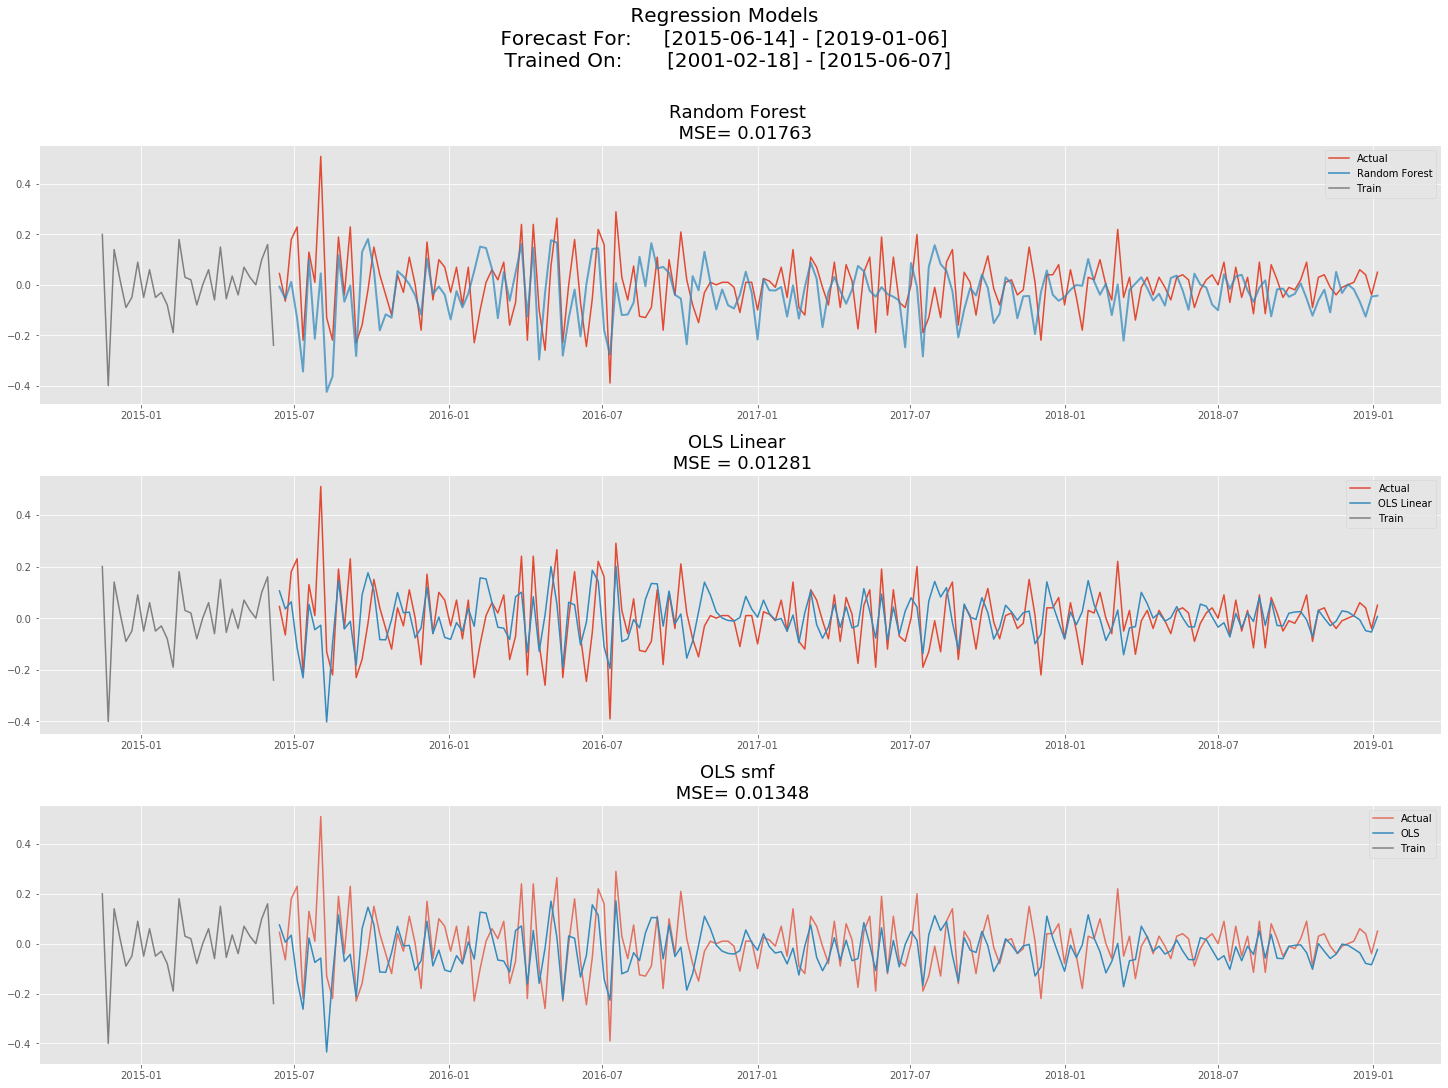

In [314]:
plot_regression(diff)

In [107]:
simple_move(diff)

MSE for cost_1weekago = 0.0125
MSE for cost_3weeksago = 0.0106


In [ ]:
.012
200
400

In [108]:
arima_order_mses(diff)

ARIMA(0, 0, 0) MSE=0.015
ARIMA(0, 0, 1) MSE=0.023
ARIMA(0, 0, 2) MSE=0.023
ARIMA(0, 0, 3) MSE=0.022
ARIMA(0, 1, 0) MSE=0.039
ARIMA(0, 1, 1) MSE=0.015
ARIMA(0, 1, 2) MSE=0.028
ARIMA(0, 1, 3) MSE=0.029
ARIMA(0, 2, 0) MSE=0.120
ARIMA(0, 2, 1) MSE=0.039
ARIMA(0, 2, 2) MSE=0.017
ARIMA(0, 2, 3) MSE=0.023
ARIMA(1, 0, 0) MSE=0.013
ARIMA(1, 0, 1) MSE=0.023
ARIMA(1, 0, 2) MSE=0.023
ARIMA(1, 0, 3) MSE=0.023
ARIMA(1, 1, 0) MSE=0.027
ARIMA(1, 1, 3) MSE=0.029
ARIMA(1, 2, 0) MSE=0.067
ARIMA(2, 0, 0) MSE=0.012
ARIMA(2, 0, 1) MSE=0.022
ARIMA(2, 0, 2) MSE=0.022
ARIMA(2, 0, 3) MSE=0.024
ARIMA(2, 1, 0) MSE=0.022
ARIMA(2, 2, 0) MSE=0.049
ARIMA(4, 0, 0) MSE=0.012
ARIMA(4, 0, 1) MSE=0.024
ARIMA(4, 0, 2) MSE=0.024
ARIMA(4, 0, 3) MSE=0.024
ARIMA(4, 1, 0) MSE=0.017
ARIMA(4, 2, 0) MSE=0.034
ARIMA(5, 0, 0) MSE=0.017
ARIMA(5, 0, 1) MSE=0.016
ARIMA(5, 0, 2) MSE=0.023
ARIMA(5, 0, 3) MSE=0.024
ARIMA(5, 1, 0) MSE=0.016
ARIMA(5, 1, 1) MSE=0.017
ARIMA(5, 2, 0) MSE=0.026
ARIMA(7, 0, 0) MSE=0.016
ARIMA(7, 0, 1) MSE=0.024


In [ ]:
ARIMA(2, 0, 0) MSE=0.012
ARIMA(4, 0, 0) MSE=0.012

In [ ]:
auto_arima()

In [285]:
auto_arima(diff)

<bound method ARIMA.predict of ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)>

In [286]:
auto_arima(train, trace=False,seasonal=False, stationary=True, stepwise=False, out_of_sample_size=round(len(diff)*.2), n_job= -1, D=1, m=52, max_p=8,max_P = 8,max_d=3, max_D=3, max_order=12).order

SyntaxError: keyword argument repeated (<ipython-input-286-2542829326a0>, line 1)

In [228]:
auto_arima_pdq(train, trace_list=True)

Fit ARIMA: (0, 0, 0)x(0, 0, 0, 1) (constant=True); AIC=1567.897, BIC=1577.137, Time=0.070 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 1) (constant=True); AIC=1166.375, BIC=1180.236, Time=0.138 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 1) (constant=True); AIC=1167.636, BIC=1186.116, Time=0.189 seconds
Fit ARIMA: (0, 0, 3)x(0, 0, 0, 1) (constant=True); AIC=1169.612, BIC=1192.712, Time=0.265 seconds
Fit ARIMA: (0, 0, 4)x(0, 0, 0, 1) (constant=True); AIC=1169.651, BIC=1197.371, Time=0.715 seconds
Fit ARIMA: (0, 0, 5)x(0, 0, 0, 1) (constant=True); AIC=1167.511, BIC=1199.852, Time=0.523 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 1) (constant=True); AIC=1357.517, BIC=1371.378, Time=0.061 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 1) (constant=True); AIC=1167.651, BIC=1186.132, Time=0.184 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 1) (constant=True); AIC=1169.631, BIC=1192.731, Time=0.502 seconds
Fit ARIMA: (1, 0, 3)x(0, 0, 0, 1) (constant=True); AIC=1170.705, BIC=1198.425, Time=0.405 seconds
Fit ARIMA: (1, 0, 4)

(6, 0, 4)

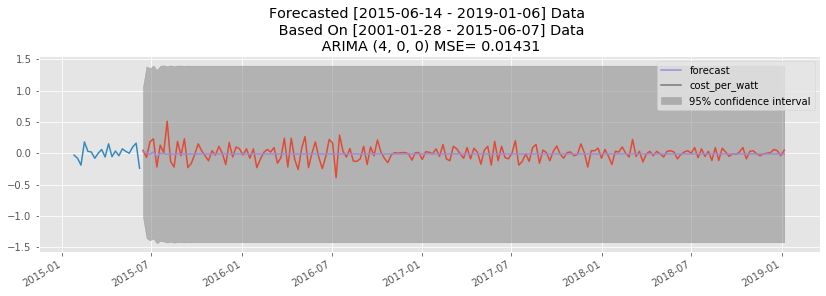

In [224]:
ARIMA_predict(diff, (4,0,0))

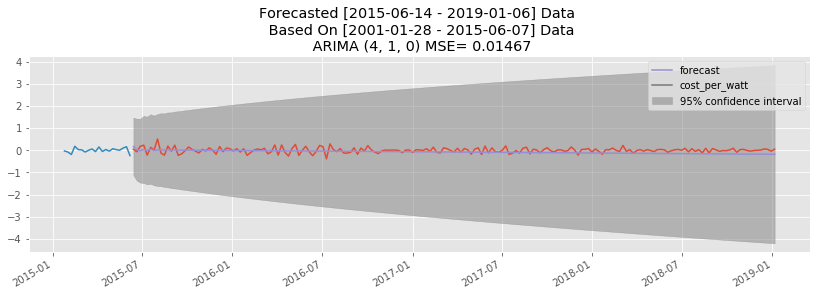

In [225]:
ARIMA_predict(diff, (4,1,0))

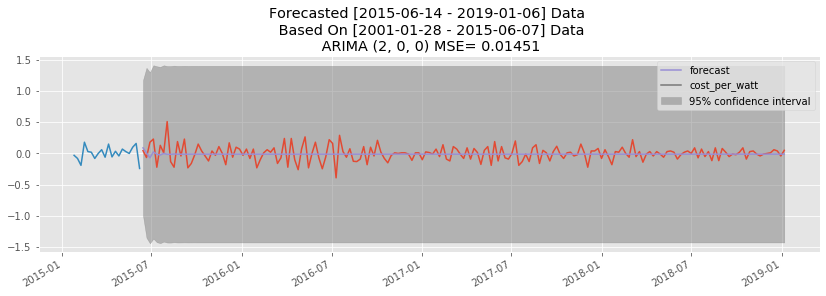

In [226]:
ARIMA_predict(diff, (2,0,0))

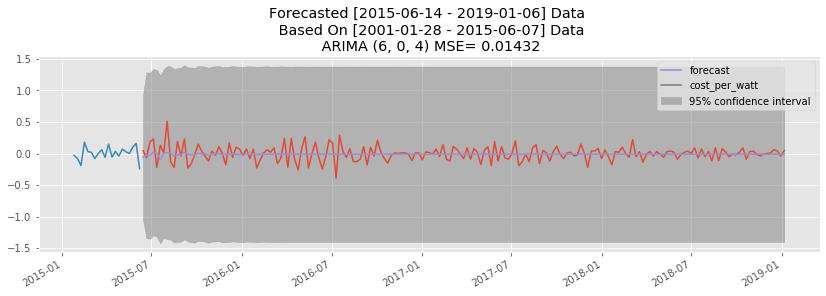

In [227]:
#order is result of auto_arima_pdq(diff)
ARIMA_predict(diff, (6,0,4))

### Split Data Into 5 Folds of Train & Test

Observations: 313
Training Observations: 157
Testing Observations: 156


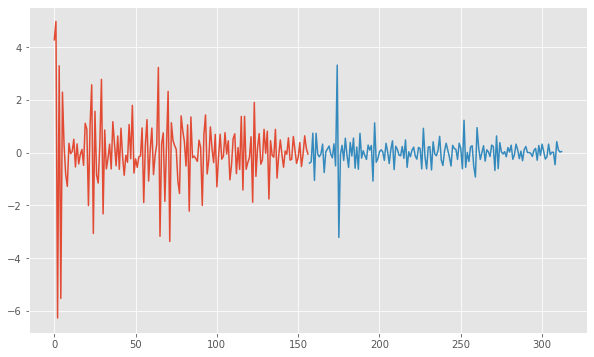

Observations: 469
Training Observations: 313
Testing Observations: 156


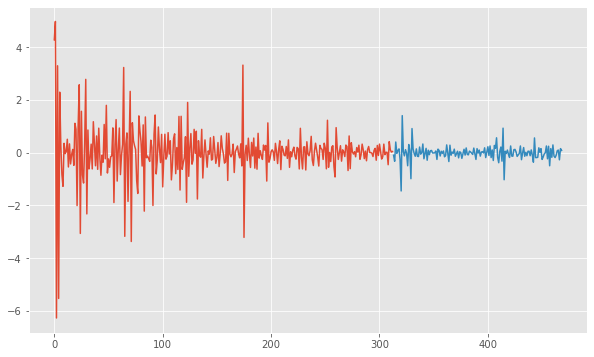

Observations: 625
Training Observations: 469
Testing Observations: 156


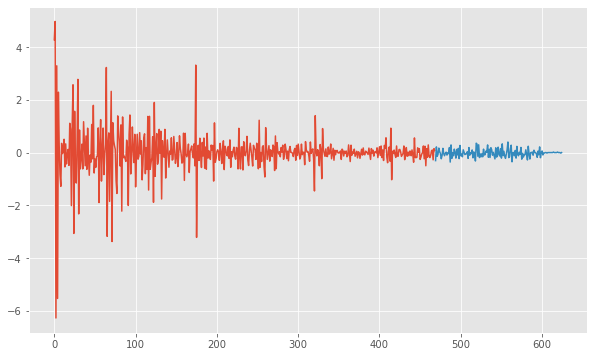

Observations: 781
Training Observations: 625
Testing Observations: 156


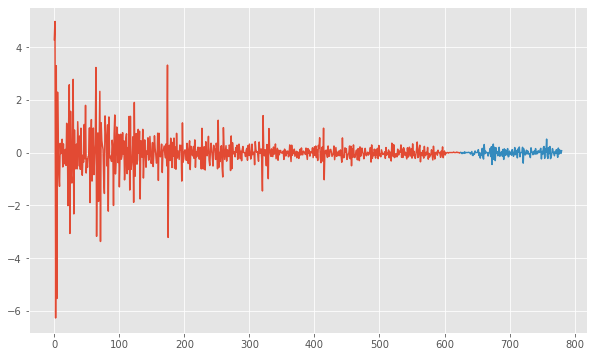

Observations: 937
Training Observations: 781
Testing Observations: 156


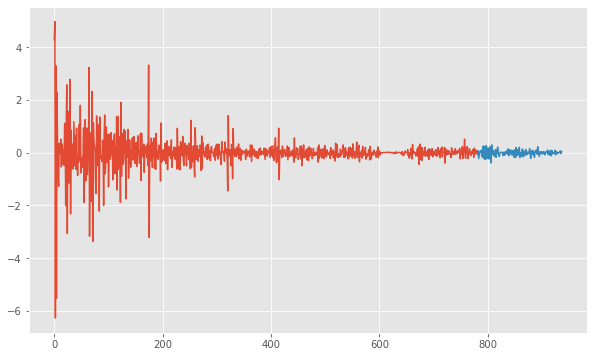

In [32]:
train, test = time_train_test_split(diff)

In [221]:
%autoreload

In [231]:
history = [x for x in train]

In [242]:
idx = round(len(diff)*.8)
train, test = diff[:idx], diff[idx:]

In [232]:
history

['cost_per_watt']

In [255]:
predictions= []

model = ARIMA(train, order=(4,0,0))
model_fit = model.fit()
yhat = model_fit.forecast()
predictions.append(yhat)

In [256]:
predictions

[(array([0.02410332]),
  array([0.5330473]),
  array([[-1.0206502 ,  1.06885683]]))]